In [89]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [91]:
#keras.datasets.mnist.load_data()

In [92]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #flutten tronsform l'image en un vecteur
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

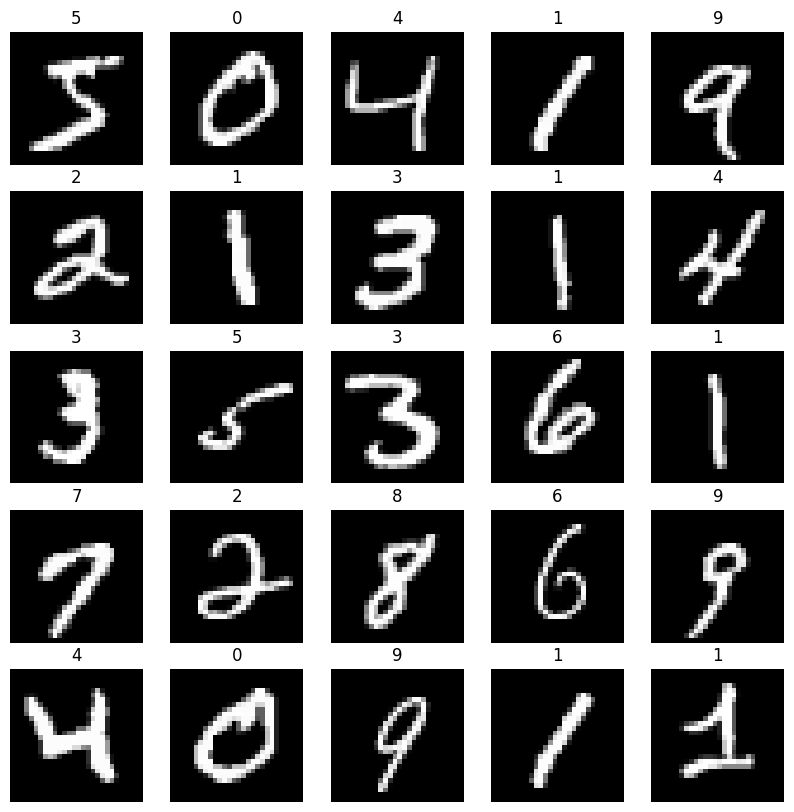

In [94]:
# Display the first few images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [95]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [96]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2411 - accuracy: 0.9288 - val_loss: 0.1237 - val_accuracy: 0.9624
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1030 - accuracy: 0.9683 - val_loss: 0.0983 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 0.0812 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 0.0904 - val_accuracy: 0.9710
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0895 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0902 - val_accuracy:

In [97]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9774
Test accuracy: 0.977400004863739


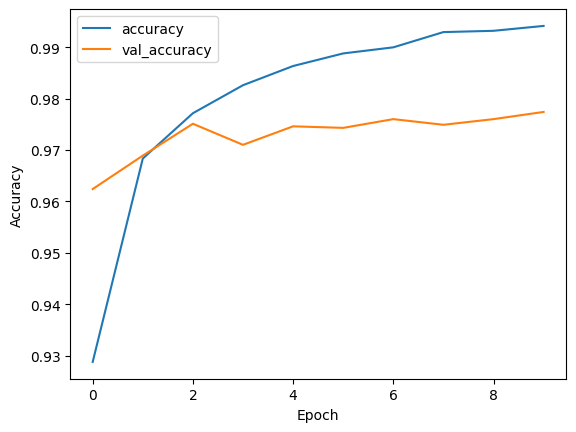

In [98]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)